In [52]:
import numpy as np 
import torch

At first we have : 
- first camera parameters -> A (focal, etc) 
- rotation  -> R 
- position - C ou T ?  matrix
- 3D points position ->  P1 P2 P3 

In [53]:
# This script defines the camera parameters, rotation matrix, and translation matrix.
def camera() : 
  # Definition of the camera parameters
  # focal length
  fx = 800
  fy = 800
  # center
  cx = 320 
  cy = 240

  A = torch.tensor([[fx, 0, cx], [0, fy, cy], [0, 0, 1]], dtype=torch.float64) # intraseca matrix of the camera (3*3)
  #A = torch.from_numpy(A)  # Convert to a PyTorch tensor
  print("A = \n", A)
  print(A.shape)  # (3*3)
  return A

A = camera() 


def rotation_matrix() : 
  # Definition of the rotation matrix of the camera 
  R = torch.tensor([[1, 0, 0],[0, -1, 0], [0, 0, -1]], dtype=torch.float64)  # (3*3)
  #R = torch.from_numpy(R)  # Convert to a PyTorch tensor
  print("R = \n",R)
  print(R.shape)  # (3*3)
  return R

def camera_position() : 
  # Definition of the translation matrix of the camera (the position)
  C = torch.tensor([[0,0,6]], dtype=torch.float64)    # T = [tx,ty,tz]  (1*3)

  print("C = \n",C)
  print(C.shape)  # (1*3)
  return C

R = rotation_matrix()
C = camera_position()

A = 
 tensor([[800.,   0., 320.],
        [  0., 800., 240.],
        [  0.,   0.,   1.]], dtype=torch.float64)
torch.Size([3, 3])
R = 
 tensor([[ 1.,  0.,  0.],
        [ 0., -1.,  0.],
        [ 0.,  0., -1.]], dtype=torch.float64)
torch.Size([3, 3])
C = 
 tensor([[0., 0., 6.]], dtype=torch.float64)
torch.Size([1, 3])


In [54]:
# Definition of 3D points in the world coordinate system
def point3Daleatoire(x) :
  # Generation of one random points in 3D space 
  return torch.tensor([[np.random.uniform(-x,x),np.random.uniform(-x,x),np.random.uniform(-x,x)]])

def pts_3D_4pts():
  # Generate randomly 4 3D points
  # Output : array which concatenate the 4 points = [ P1, P2, P3, P4 ] 

  P1 = point3Daleatoire(2)     # (1*3) -> pour P3P
  P2 = point3Daleatoire(2)
  P3 = point3Daleatoire(2)
  P4 = point3Daleatoire(2)
  
  points3D = torch.cat((P1,P2,P3,P4),dim=0);     # (LIGNES 4* COLONNES 3) - xyz
  print("points3D = \n", points3D)
  print(points3D.shape)  # (4*3)
  return points3D

P1 = torch.tensor([0.7161, 0.5431, 1.7807], dtype=torch.float64)
P2 = torch.tensor([-1.1643, 0.8371, -1.0551], dtype=torch.float64)
P3 = torch.tensor([-1.5224, 0.4292, -0.1994], dtype=torch.float64)
P4 = torch.tensor([-1.5224, 0.4292, -0.1994], dtype=torch.float64) 


print("P1 = \n", P1)
print(P1.shape)  # (3,)
print("P2 = \n", P2)
print("P3 = \n", P3)
print("P4 = \n", P4)

P1 = 
 tensor([0.7161, 0.5431, 1.7807], dtype=torch.float64)
torch.Size([3])
P2 = 
 tensor([-1.1643,  0.8371, -1.0551], dtype=torch.float64)
P3 = 
 tensor([-1.5224,  0.4292, -0.1994], dtype=torch.float64)
P4 = 
 tensor([-1.5224,  0.4292, -0.1994], dtype=torch.float64)


We create the 3 direction features vectors f1, f2, f3

In [55]:
def features_vectors(points3D,C, R) :
    '''
    This function computes the features vectors for P3P algorithm.
    args:
    points3D : array with the 4 3D points = [ P1, P2, P3, P4 ] (4*3) 
    but we only use the first three points for P3P
    C: camera position matrix : (3*1)
    returns:
    featuresVect : array with the features vectors (9*1)
    '''
    P1 = torch.reshape(points3D[0], (3,1))  # Reshape to (3,1) for easier calculations
    P2 = torch.reshape(points3D[1], (3,1))
    P3 = torch.reshape(points3D[2], (3,1))

    C = torch.reshape(C, (3,1))  # Reshape C to (3,1) for easier calculations
    v1 = torch.tensordot(R,(P1 - C), dims=1)  # Calculate the vector from camera to P1
    v2 = torch.tensordot(R,(P2 - C), dims=1)  # Calculate the vector from camera to P2
    v3 = torch.tensordot(R,(P3 - C), dims=1)  # Calculate the vector from camera to P3

    f1 = v1 / torch.norm(v1)
    f2 = v2 / torch.norm(v2)
    f3 = v3 / torch.norm(v3)

    f1 = torch.reshape(f1, (1,3))  # Reshape to (3,1)
    print(f1.shape) # (1,3)
    f2 = torch.reshape(f2, (1,3))
    f3 = torch.reshape(f3, (1,3))

    featuresVect = torch.cat((f1,f2,f3),dim=0)
    print("features vectors = \n",featuresVect)
    print(featuresVect.shape)  # (3,3)

    return featuresVect # Return the features vectors need in P3P


points3D = [P1, P2, P3]  # We define the points3D with the first three points
print("points3D = \n", points3D)  # Print the points3D to check the values  / List len = 3 

featuresVect = features_vectors(points3D, C, R)  

points3D = 
 [tensor([0.7161, 0.5431, 1.7807], dtype=torch.float64), tensor([-1.1643,  0.8371, -1.0551], dtype=torch.float64), tensor([-1.5224,  0.4292, -0.1994], dtype=torch.float64)]
torch.Size([1, 3])
features vectors = 
 tensor([[ 0.1660, -0.1259,  0.9781],
        [-0.1617, -0.1163,  0.9800],
        [-0.2379, -0.0671,  0.9690]], dtype=torch.float64)
torch.Size([3, 3])


Lastly we need the functions to resolve the polynomial roots. - for test go to test resolution polynome 

In [56]:
from complex_utils import *


def polynomial_root_calculation_4th_degree_ferrari(a): # Ferrari's Method
    # Solving a polynomial of 4th degree

    # Input : array 5*1 with the 5 coefficiants of the polynomial 
    # Output : roots of the polynomial a[4]*x^4 + a[3]*x^3 + a[2]*x^2 + a[1]*x + a[0]   -> array : [x1,x2,x3,x4]  (4*1)

    if a.numel() != 5 :
      print("Expeted 5 coefficiants for a 4th order polynomial")
      return

    a0, a1, a2, a3, a4 = a      # float

    # Reduce the quartic equation to the form : x^4 + a*x^3 + b*x^2 + c*x + d = 0
    a = a3/a4           # float 
    b = a2/a4
    c = a1/a4
    d = a0/a4

    # Computation of the coefficients of the Ferrari's Method
    S = a/4
    b0 = d - c*S + b* S**2 - 3* S**4
    b1 = c - 2*b*S + 8*S**3
    b2 = b - 6 * S**2


    # Solve the cubic equation m^3 + b2*m^2 + (b2^2/4  - b0)*m - b1^2/8 = 0
    x_cube = polynomial_root_calculation_3rd_degree(1,b2,(b2**2)/4-b0,(-b1**2)/8)
    

    # Find a real and positive solution
    alpha_0_nul = True
    for r in x_cube :
      if torch.isclose(r[1],torch.tensor(0.0,dtype=torch.float64),atol=1e-7) and r[0] > 0 :
        alpha_0 = r
        alpha_0_nul = False
        

    if alpha_0_nul == False :   # case where we found a real and positive solution so alpha_0_imag = 0 
        alpha0_div_2 = product_complex_real(alpha_0,0.5)
        sqrt_alpha = sqrt(alpha0_div_2[0])
        term = addition_complex_real(- alpha0_div_2 ,-b2 / 2)
        denom = 2 * torch.sqrt(2 * alpha_0)
        
       
        frac = division_2_complex_numbers(torch.tensor([b1, 0.0]), denom)  # b1 is real, so we can use a tensor with 0 imaginary part

        x1 = addition_complex_real(sqrt_alpha ,- S) + sqrt_complex(addition(term,-frac))
        x2 = addition_complex_real(sqrt_alpha, - S) - sqrt_complex(addition(term,-frac))
        x3 = addition_complex_real(-sqrt_alpha, - S) + sqrt_complex(addition(term,frac))
        x4 = addition_complex_real(-sqrt_alpha,- S) - sqrt_complex(addition(term,frac))
    
    else:

        sqrt_inner1 = sqrt((b2**2) / 4 - b0)        # complex 
        x1 = addition_complex_real(sqrt_complex(addition_complex_real(sqrt_inner1,-b2 / 2)),-S)
        x2 = addition_complex_real(- sqrt_complex(addition_complex_real(sqrt_inner1,-b2 / 2)),-S)
        x3 = addition_complex_real(sqrt_complex(addition_complex_real(- sqrt_inner1,-b2 / 2 )),-S)
        x4 = addition_complex_real(- sqrt_complex(addition_complex_real(- sqrt_inner1,-b2 / 2 )),-S)

    return [x1, x2, x3, x4]




We have all the variables needed for the p3p so we start

1. on stocke les points : c'est fait

In [57]:
print(P1, P2, P3)

tensor([0.7161, 0.5431, 1.7807], dtype=torch.float64) tensor([-1.1643,  0.8371, -1.0551], dtype=torch.float64) tensor([-1.5224,  0.4292, -0.1994], dtype=torch.float64)


2. Stpockage des features vectors : fait

In [58]:
# we got featuresVect and we access the 3 values 
f1 = featuresVect[0]
f2 = featuresVect[1]
f3 = featuresVect[2]

print("f1 = ", f1)
print(f1.shape)  # (3,)
print("f2 = ", f2)
print("f3 = ", f3)

f1 =  tensor([ 0.1660, -0.1259,  0.9781], dtype=torch.float64)
torch.Size([3])
f2 =  tensor([-0.1617, -0.1163,  0.9800], dtype=torch.float64)
f3 =  tensor([-0.2379, -0.0671,  0.9690], dtype=torch.float64)


3. on créer la variable de solution, au maximum on a 4 solutions, on a la (3,1) qui contiendra C et (3,3) contiendra R 

In [59]:
solutions = torch.zeros((4,3,4), dtype=torch.float64)
print("solutions = \n", solutions)
print(solutions.shape)  # (4,3,4)

solutions = 
 tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]], dtype=torch.float64)
torch.Size([4, 3, 4])


4. On teste si les 3 points ne sont pas colinéaires

In [60]:
# Test of non-collinearity
v1 = P2 - P1
v2 = P3 - P1
if torch.norm(torch.cross(v1,v2, dim=0))==0 :
    print('Problem: the points must not be collinear')
else:
    print('The points are not collinear, we can continue')

The points are not collinear, we can continue


5. On crée un repère orthonormée à partir de f1, f2, f3

In [61]:
# Calculation of vectors of the base τ = (C,tx,ty,tz)
tx = f1     
print("tx = ", tx)
print(tx.shape)  # (3,)
tz = torch.cross(f1,f2)/torch.norm(torch.cross(f1,f2))
print("tz = ", tz)
ty = torch.cross(tz,tx)
print("ty = ", ty)

tx =  tensor([ 0.1660, -0.1259,  0.9781], dtype=torch.float64)
torch.Size([3])
tz =  tensor([-0.0298, -0.9920, -0.1226], dtype=torch.float64)
ty =  tensor([-0.9857,  0.0088,  0.1684], dtype=torch.float64)


tx = tensor([ 0.1660, -0.1259,  0.9781], dtype=torch.float64)
ty = tensor([-0.9857,  0.0088,  0.1684], dtype=torch.float64)
tz = tensor([-0.0298, -0.9920, -0.1226], dtype=torch.float64)

Vérification orthogonalité :
tx · ty = 0.0
tx · tz = -2.7755575615628914e-17
ty · tz = -3.469446951953614e-18


C:\Users\pmamalet\AppData\Local\Temp\ipykernel_18092\3927387243.py:8: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  print("tx · ty =", np.dot(tx, ty))
C:\Users\pmamalet\AppData\Local\Temp\ipykernel_18092\3927387243.py:9: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  print("tx · tz =", np.dot(tx, tz))
C:\Users\pmamalet\AppData\Local\Temp\ipykernel_18092\3927387243.py:10: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed.

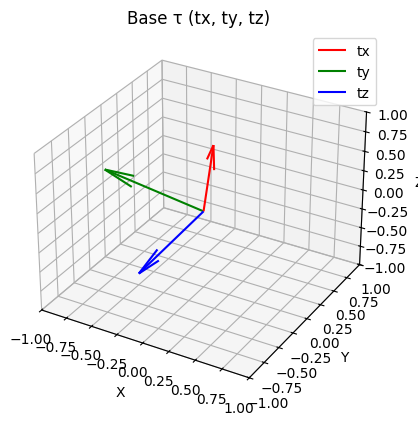

In [62]:
import numpy as np
import matplotlib.pyplot as plt
print("tx =", tx)
print("ty =", ty)
print("tz =", tz)

print("\nVérification orthogonalité :")
print("tx · ty =", np.dot(tx, ty))
print("tx · tz =", np.dot(tx, tz))
print("ty · tz =", np.dot(ty, tz))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

origin = np.zeros(3)

ax.quiver(*origin, *tx, color='r', label='tx')
ax.quiver(*origin, *ty, color='g', label='ty')
ax.quiver(*origin, *tz, color='b', label='tz')

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Base τ (tx, ty, tz)')
ax.legend()
plt.show()


5.bis On crée la matrice de transformation T  

In [63]:
tx = torch.reshape(tx,(1,3))   # (1*3)
ty = torch.reshape(ty,(1,3))
tz = torch.reshape(tz,(1,3))

# Computation of the matrix T and the feature vector f3
T = torch.cat((tx,ty,tz),dim = 0) # (3*3)
f3_T = torch.tensordot(T,f3, dims=1) # (3,)

print("tx = \n", tx)
print(tx.shape)  # (1*3)
print("ty = \n", ty)
print("tz = \n", tz)
print("f3_T = \n", f3_T)
print(f3_T.shape)  # (3,)
print("T = \n", T)
print(T.shape)  # (3,3)

tx = 
 tensor([[ 0.1660, -0.1259,  0.9781]], dtype=torch.float64)
torch.Size([1, 3])
ty = 
 tensor([[-0.9857,  0.0088,  0.1684]], dtype=torch.float64)
tz = 
 tensor([[-0.0298, -0.9920, -0.1226]], dtype=torch.float64)
f3_T = 
 tensor([ 0.9166,  0.3971, -0.0452], dtype=torch.float64)
torch.Size([3])
T = 
 tensor([[ 0.1660, -0.1259,  0.9781],
        [-0.9857,  0.0088,  0.1684],
        [-0.0298, -0.9920, -0.1226]], dtype=torch.float64)
torch.Size([3, 3])


Il faut satisfaire la condition que z dans f3_T est négative, sinon on inverse l'ordre des vecteur afin de .... 

In [64]:
f3_T_positif = False

# Having teta in [ 0, pi ] 
if f3_T[2] > 0 :
    f3_T_positif = True
   

6. on change de base du coté des points 3D

In [65]:
# Calculation of vectors of the base η = (P1,nx,ny,nz)
nx = (P2 - P1)/torch.norm(P2 - P1)      #(3,)
nz = torch.cross(nx,P3-P1)/torch.norm(torch.cross(nx,P3-P1), dim=0)  
ny = torch.cross(nz,nx)
print("nx = ", nx)
print(nx.shape)  # (3,)
print("ny = ", ny)
print("nz = ", nz)

# Reshape the vectors to (1,3) for concatenation
nx = torch.reshape(nx,(1,3))  # (1,3)
ny = torch.reshape(ny,(1,3))
nz = torch.reshape(nz,(1,3))
print("nx = \n", nx)
print(nx.shape)  # (1*3)
print("ny = \n", ny)
print("nz = \n", nz)

# Computation of the matrix N and the world point P3
N = torch.cat((nx,ny,nz),dim = 0) # (3*3) T's equivalent in the world coordinate system

P3_n = torch.tensordot(N,P3-P1, dims=1) # (3,)

print("N = \n", N)
print(N.shape)  # (3,3)
print("P3_n = \n", P3_n)
print(P3_n.shape)  # (3,)


nx =  tensor([-0.5506,  0.0861, -0.8303], dtype=torch.float64)
torch.Size([3])
ny =  tensor([-0.7747, -0.4233,  0.4698], dtype=torch.float64)
nz =  tensor([-0.3110,  0.9019,  0.2998], dtype=torch.float64)
nx = 
 tensor([[-0.5506,  0.0861, -0.8303]], dtype=torch.float64)
torch.Size([1, 3])
ny = 
 tensor([[-0.7747, -0.4233,  0.4698]], dtype=torch.float64)
nz = 
 tensor([[-0.3110,  0.9019,  0.2998]], dtype=torch.float64)
N = 
 tensor([[-0.5506,  0.0861, -0.8303],
        [-0.7747, -0.4233,  0.4698],
        [-0.3110,  0.9019,  0.2998]], dtype=torch.float64)
torch.Size([3, 3])
P3_n = 
 tensor([2.8668, 0.8521, 0.0000], dtype=torch.float64)
torch.Size([3])


7. On définit des variable pour la suite

In [66]:
# Computation of phi1 et phi2 with 0=x, 1=y, 2=z
phi1 = f3_T[0]/f3_T[2]
phi2 = f3_T[1]/f3_T[2]
print("phi1 = ", phi1)
print("phi2 = ", phi2)

# Extraction of p1 and p2 from P3_eta
p1 = P3_n[0] #x
p2 = P3_n[1] #y
print("p1 = ", p1)
print("p2 = ", p2)

# Computation of d12
d12 = torch.norm(P2-P1)
print("d12 = ", d12)

# Computation of b = cot(beta)
cosBeta = torch.dot(f1,f2)/(torch.norm(f1)*torch.norm(f2)) 
print("cosBeta = ", cosBeta)  
b = torch.sqrt(1/(1-cosBeta**2)-1)

if cosBeta < 0 :
    b = -b
print("b = ", b)

phi1 =  tensor(-20.2913, dtype=torch.float64)
phi2 =  tensor(-8.7914, dtype=torch.float64)
p1 =  tensor(2.8668, dtype=torch.float64)
p2 =  tensor(0.8521, dtype=torch.float64)
d12 =  tensor(3.4153, dtype=torch.float64)
cosBeta =  tensor(0.9463, dtype=torch.float64)
b =  tensor(2.9257, dtype=torch.float64)


In [67]:
a4 = - phi2**2 * p2**4 - phi1**2 * p2**4 - p2**4
a3 = 2 * p2**3 * d12 * b + 2 * phi2**2 * p2**3 * d12 * b - 2 * phi1 * phi2 * p2**3 * d12
a2 = - phi2**2 * p1**2 * p2**2 - phi2**2 * p2**2 * d12**2 * b**2 - phi2**2 * p2**2 * d12**2 + phi2**2 * p2**4 + phi1**2 * p2 **4 + 2 * p1 * p2**2 * d12 + 2 * phi1 * phi2 * p1 * p2**2 * d12 * b - phi1**2 * p1**2 * p2**2 + 2 * phi2**2 * p1 * p2**2 * d12 - p2**2 * d12**2 * b**2 - 2 * p1**2 * p2**2
a1 = 2 * p1**2 * p2 * d12 * b + 2 * phi1 * phi2 * p2**3 * d12 - 2 * phi2**2 * p2**3 * d12 * b - 2 * p1 * p2 * d12**2 * b
a0 = - 2 * phi1 * phi2 * p1 * p2**2 * d12 * b + phi2**2 * p2**2 * d12**2 + 2 * p1**3 * d12 - p1**2 * d12**2 + phi2**2 * p1**2 * p2**2 - p1**4 - 2 * phi2**2 * p1 * p2**2 * d12 + phi1**2 * p1**2 * p2**2 + phi2**2 * p2**2 * d12**2 * b**2

print("a4 = ", a4)
print("a3 = ", a3)
print("a2 = ", a2)
print("a1 = ", a1)
print("a0 = ", a0)


a4 =  tensor(-258.3021, dtype=torch.float64)
a3 =  tensor(214.0641, dtype=torch.float64)
a2 =  tensor(-468.5401, dtype=torch.float64)
a1 =  tensor(-228.4748, dtype=torch.float64)
a0 =  tensor(653.6391, dtype=torch.float64)


In [68]:
# Computation of the roots
roots = polynomial_root_calculation_4th_degree_ferrari(torch.tensor([a0,a1,a2,a3,a4])) # (4,)

print("roots = \n", roots)  # list of tensor (for complex numbers)


roots = 
 [tensor([0.4313, 1.6044], dtype=torch.float64), tensor([ 0.4313, -1.6044], dtype=torch.float64), tensor([0.9407, 0.0000], dtype=torch.float64), tensor([-0.9746, -0.0000], dtype=torch.float64)]


c:\Users\pmamalet\Documents\Stage\PoseEstimation\complex_utils.py:80: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor([torch.sqrt(torch.tensor(a)), 0.0])


In [69]:
# For each solution of the polynomial
for i in range(4):
  #if np.isclose(np.imag(roots[i]),0) : # if real solution 

    # Computation of trigonometrics forms
    cos_teta = torch.tensor(roots[i][0])# real part of the root 
    sin_teta = torch.sqrt(1-cos_teta**2)

    cot_alpha = ((phi1/phi2)*p1 + cos_teta*p2 -d12*b )/ ((phi1/phi2)*cos_teta* p2 - p1 + d12)

    sin_alpha = torch.sqrt(1/(cot_alpha**2+1))
    cos_alpha= torch.sqrt(1-sin_alpha**2)

    if cot_alpha < 0 :
      cos_alpha = -cos_alpha

    # Computation of the intermediate rotation's matrixs
    C_estimate = torch.tensor([d12*cos_alpha*(sin_alpha*b + cos_alpha), d12*sin_alpha*cos_teta*(sin_alpha*b+cos_alpha), d12*sin_alpha*sin_teta*(sin_alpha*b+cos_alpha)]) # (3,)
    print("C_estimate = \n", C_estimate)
    print(C_estimate.shape)  # (3,)
    Q = torch.tensor([[-cos_alpha, -sin_alpha*cos_teta, -sin_alpha*sin_teta], [sin_alpha, -cos_alpha*cos_teta, -cos_alpha*sin_teta], [0, -sin_teta, cos_teta]])    # (3*3)
    print("Q = \n", Q)
    print(Q.shape)  # (3,3)
    # Computation of the absolute camera center
  
    C_estimate = P1 + torch.tensordot(torch.transpose(N, 0,1), C_estimate, dims=1) # (3,)
    print("C_estimate = \n", C_estimate) 
    print(C_estimate.shape)  # (3,)
    C_estimate = torch.reshape(C_estimate, (3,1))  # Reshape to (3,1) for consistency
    print("C_estimate = \n", C_estimate)  # (3,1)
    print("C_estimate.shape = ", C_estimate.shape)  # (3,1)

    # Computation of the orientation matrix
    R_estimate = torch.tensordot(torch.tensordot(torch.transpose(N,0,1),torch.transpose(Q, 0,1), dims=1),T,dims=1)   # (3*3)
    print("R_estimate = \n", R_estimate)
    print(R_estimate.shape)  # (3,3)
    
    # Adding C and R to the solutions
    solutions[i,:,:1]= C_estimate
    solutions[i,:,1:] = R_estimate

print("solutions = \n", solutions)


C_estimate = 
 tensor([-1.0076,  0.2018,  0.4222], dtype=torch.float64)
torch.Size([3])
Q = 
 tensor([[ 0.9070, -0.1817, -0.3800],
        [ 0.4212,  0.3912,  0.8183],
        [ 0.0000, -0.9022,  0.4313]], dtype=torch.float64)
torch.Size([3, 3])
C_estimate = 
 tensor([0.9832, 0.7517, 2.8388], dtype=torch.float64)
torch.Size([3])
C_estimate = 
 tensor([[0.9832],
        [0.7517],
        [2.8388]], dtype=torch.float64)
C_estimate.shape =  torch.Size([3, 1])
R_estimate = 
 tensor([[ 0.7214, -0.5369, -0.4374],
        [-0.6541, -0.7357, -0.1756],
        [-0.2275,  0.4128, -0.8820]], dtype=torch.float64)
torch.Size([3, 3])
C_estimate = 
 tensor([-1.0076,  0.2018,  0.4222], dtype=torch.float64)
torch.Size([3])
Q = 
 tensor([[ 0.9070, -0.1817, -0.3800],
        [ 0.4212,  0.3912,  0.8183],
        [ 0.0000, -0.9022,  0.4313]], dtype=torch.float64)
torch.Size([3, 3])
C_estimate = 
 tensor([0.9832, 0.7517, 2.8388], dtype=torch.float64)
torch.Size([3])
C_estimate = 
 tensor([[0.9832],
        

C:\Users\pmamalet\AppData\Local\Temp\ipykernel_18092\4123210296.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  cos_teta = torch.tensor(roots[i][0])# real part of the root


In [74]:
print("solutions = \n", solutions)
print(solutions.shape)  # (4,3,4)

solutions = 
 tensor([[[ 9.8322e-01,  7.2140e-01, -5.3692e-01, -4.3738e-01],
         [ 7.5168e-01, -6.5409e-01, -7.3574e-01, -1.7564e-01],
         [ 2.8388e+00, -2.2749e-01,  4.1279e-01, -8.8196e-01]],

        [[ 9.8322e-01,  7.2140e-01, -5.3692e-01, -4.3738e-01],
         [ 7.5168e-01, -6.5409e-01, -7.3574e-01, -1.7564e-01],
         [ 2.8388e+00, -2.2749e-01,  4.1279e-01, -8.8196e-01]],

        [[ 6.8834e-15,  1.0000e+00, -3.7068e-15, -1.7408e-15],
         [ 1.4877e-14, -3.6966e-15, -1.0000e+00, -2.5909e-15],
         [ 6.0000e+00, -1.7123e-15,  2.6610e-15, -1.0000e+00]],

        [[-1.2586e+00,  8.4783e-01, -5.1920e-01,  1.0778e-01],
         [ 2.2671e+00,  5.2791e-01,  8.0731e-01, -2.6374e-01],
         [-3.9910e+00,  4.9920e-02,  2.8051e-01,  9.5855e-01]]],
       dtype=torch.float64)
torch.Size([4, 3, 4])


In [76]:
def projection3D2D(point3D,C,R,A) :
  # 3D point = [ Xw, Yw, Zw ]'   (1*3)
  # T : camera translation matrix : (3*1)
  # R : camera rotation matrix : (3*3)
  # A : intraseca matrix of the camera : (3*3)
  # Output : return the coordonates of the point in 2D 

  PI = torch.cat((torch.eye(3, dtype=torch.float64),torch.zeros((3,1), dtype=torch.float64)),dim=1)  # (3*4)

  Rt = torch.cat((R,C),dim=1)               # (3*4)
  Rt = torch.cat((Rt,torch.tensor([[0,0,0,1]], dtype=torch.float64)),dim=0)   # (4*4)

  point3D_bis = torch.cat((torch.reshape(point3D,(3,1)),torch.tensor([[1]],dtype=torch.float64)),dim=0)   #(4*1)
  
  point2D = torch.tensordot(torch.tensordot(torch.tensordot(A,PI,dims=1),Rt,dims=1),point3D_bis,dims=1)  # 2D point = [u, v, w] (3*1)
  point2D = point2D / point2D[2]        # 2D point = [u, v, 1] (3*1)
  return point2D[:2]


C_transpose = torch.transpose(C, 0, 1)  # (3*1) -> (1*3)

p1 = projection3D2D(P1,C_transpose,R,A)
print("p1 = ", p1)
print(p1.shape)  # (2,1)
p2 = projection3D2D(points3D[1],C_transpose,R,A)
print("p2 = ", p2)
p3 = projection3D2D(points3D[2],C_transpose,R,A)
print("p3 = ", p3)
p4 = projection3D2D(P4,C_transpose,R,A)
print("p4 = ", p4)




p1 =  tensor([[455.7761],
        [137.0256]], dtype=torch.float64)
torch.Size([2, 1])
p2 =  tensor([[187.9764],
        [145.0786]], dtype=torch.float64)
p3 =  tensor([[123.5423],
        [184.6140]], dtype=torch.float64)
p4 =  tensor([[123.5423],
        [184.6140]], dtype=torch.float64)


In [72]:
def distance(pt, pt_estimation):
    erreur = torch.tensor(0, dtype=torch.float64)  # Initialize error as a tensor
    for i in range(len(pt)): 
      erreur = erreur + torch.tensor((pt[i] - pt_estimation[i])**2, dtype=torch.float64)  # Ensure each term is a tensor
      #erreur += (pt[i] - pt_estimation[i])**2
    return torch.sqrt(erreur)



def affichage_erreur(solutions,points2D,points3D,A) : 
   # Compute the error of estimation for each points after the P3P algorithm 

   # solutions : solution matrix returned by P3P (4*3*4)
   # points 3D : 4 pts 3D used for P3P 
   # points 2D : 4 pts 2D used for P3P (image of the 3D points)
   
   P1 = points3D[0]
   P2 = points3D[1]
   P3 = points3D[2]
   P4 = points3D[3]

   erreurs = []
   nb_sol = 0

   for i in range(len(solutions)) : 
      R = solutions[i,:,1:] 
      C = solutions[i,:,:1]

      if not torch.all(R==torch.zeros((3,3))) : 
        nb_sol += 1 
        print("------------ Solution n° : ",nb_sol,"----------------")
        print("R = \n",R,)
        print("T = \n",C,)

        p1_P3P = torch.reshape(projection3D2D(P1,C,R,A),(1,2))
        p2_P3P = torch.reshape(projection3D2D(P2,C,R,A),(1,2))
        p3_P3P = torch.reshape(projection3D2D(P3,C,R,A),(1,2))
        p4_P3P = torch.reshape(projection3D2D(P4,C,R,A),(1,2))
        pt_2D_P3P = torch.cat((p1_P3P,p2_P3P,p3_P3P,p4_P3P),dim=0)    # (4,2)

        erreurs.append([0])
        for j in range(len(points2D)):
            erreur_pt = distance(points2D[j],pt_2D_P3P[j])
            erreurs[i]+=erreur_pt
        
   indice_min = 0
   min = erreurs[0]
   for i in range(1,len(erreurs)) :
    if erreurs[i]<min :
      min = erreurs[i]
      indice_min = i

   R_opti = solutions[indice_min,:,1:] 
   C_opti = solutions[indice_min,:,:1]
   print("\n------------ Best solution : ----------------")
   print("Solution n° :",indice_min+1,"\n")
   print("R estimé = \n", R_opti,"\n")
   print("T estimé = \n", C_opti, "\n")

In [73]:
affichage_erreur(solutions, [p1, p2, p3, p4], [P1,P2,P3, P4], A)

------------ Solution n° :  1 ----------------
R = 
 tensor([[ 0.7214, -0.5369, -0.4374],
        [-0.6541, -0.7357, -0.1756],
        [-0.2275,  0.4128, -0.8820]], dtype=torch.float64)
T = 
 tensor([[0.9832],
        [0.7517],
        [2.8388]], dtype=torch.float64)
------------ Solution n° :  2 ----------------
R = 
 tensor([[ 0.7214, -0.5369, -0.4374],
        [-0.6541, -0.7357, -0.1756],
        [-0.2275,  0.4128, -0.8820]], dtype=torch.float64)
T = 
 tensor([[0.9832],
        [0.7517],
        [2.8388]], dtype=torch.float64)
------------ Solution n° :  3 ----------------
R = 
 tensor([[ 1.0000e+00, -3.7068e-15, -1.7408e-15],
        [-3.6966e-15, -1.0000e+00, -2.5909e-15],
        [-1.7123e-15,  2.6610e-15, -1.0000e+00]], dtype=torch.float64)
T = 
 tensor([[6.8834e-15],
        [1.4877e-14],
        [6.0000e+00]], dtype=torch.float64)
------------ Solution n° :  4 ----------------
R = 
 tensor([[ 0.8478, -0.5192,  0.1078],
        [ 0.5279,  0.8073, -0.2637],
        [ 0.0499,  0.

C:\Users\pmamalet\AppData\Local\Temp\ipykernel_18092\875224362.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  erreur = erreur + torch.tensor((pt[i] - pt_estimation[i])**2, dtype=torch.float64)  # Ensure each term is a tensor
